## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

## Importing the Data and Pre-processing

In [2]:
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/a7madmostafa/365datascience/master/20%20-%20Time%20Series%20Analysis%20in%20Python/3_Introduction%20to%20Time%20Series%20in%20Python/1_Introduction%20to%20Time%20Series%20Data%20(3%3A56)/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.ffill()

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The LLR Test

In [5]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [6]:
df['returns'] = df.market_value.pct_change(1)*100

## ARIMA(1,1,1)

In [7]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1), trend='t')
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.662
Date:                Mon, 05 Aug 2024   AIC                          55215.323
Time:                        00:34:53   BIC                          55241.408
Sample:                    01-07-1994   HQIC                         55224.464
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5641      0.753      0.750      0.453      -0.911       2.039
ar.L1          0.7475      0.059     12.676      0.000       0.632       0.863
ma.L1         -0.7936      0.053    -14.876      0.000      -0.898      -0.689
sigma2      3496.7444     41.194     84.886      0.000    3416.007    3577.482
===================================================================================
Ljung-Box (L1) (Q):                   2.65   Jarque-Bera (JB):              3327.45
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Residuals of the ARIMA(1,1,1)

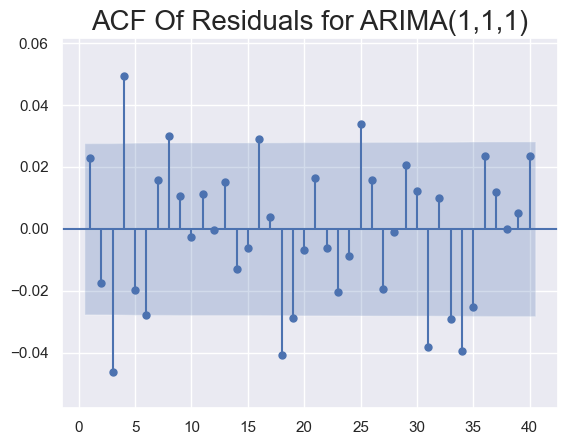

In [8]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40,auto_ylims=True)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

## Higher-Lag ARIMA Models

In [9]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2), trend='t')
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3), trend='t')
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1), trend='t')
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1), trend='t')
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2), trend='t')
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()

In [10]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -27603.661702964546 	 AIC =  55215.32340592909
ARIMA(1,1,2):  	 LL =  -27600.07322408194 	 AIC =  55210.14644816388
ARIMA(1,1,3):  	 LL =  -27590.417706706277 	 AIC =  55192.835413412555
ARIMA(2,1,1):  	 LL =  -27599.798222540354 	 AIC =  55209.59644508071
ARIMA(3,1,1):  	 LL =  -27592.045891386093 	 AIC =  55196.091782772186
ARIMA(3,1,2):  	 LL =  -27590.65028682675 	 AIC =  55195.3005736535


In [11]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_2, model_ar_1_i_1_ma_3)))


LLR test p-value = 0.0


In [12]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_1_i_1_ma_3, DF = 2)))


LLR test p-value = 0.0


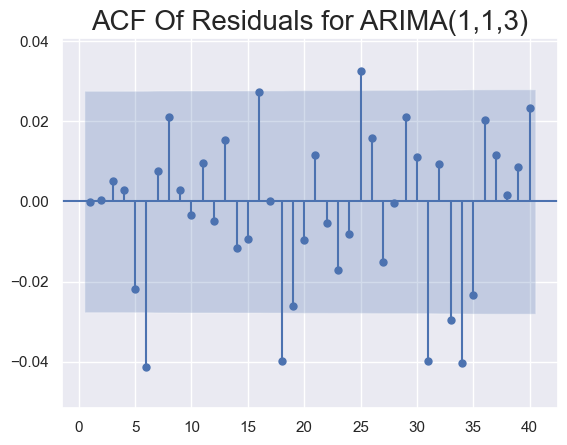

In [13]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero = False, lags = 40,auto_ylims=True)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size=20)
plt.show()

In [14]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1), trend='t')
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3), trend='t')
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit()

In [15]:
results_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.508
Date:                Mon, 05 Aug 2024   AIC                          55189.017
Time:                        00:35:20   BIC                          55241.186
Sample:                    01-07-1994   HQIC                         55207.297
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5599      0.745      0.752      0.452      -0.900       2.020
ar.L1          0.4022      0.153      2.623      0.009       0.102       0.703
ar.L2         -0.0444      0.011     -4.075      0.000      -0.066      -0.023
ar.L3         -0.0542      0.013     -4.228      0.000      -0.079      -0.029
ar.L4          0.0587      0.015      3.916      0.000       0.029       0.088
ar.L5         -0.0582      0.009     -6.318      0.000      -0.076      -0.040
ma.L1         -0.4225      0.154     -2.746      0.006      -0.724      -0.121
sigma2      3478.5659     42.288     82.259      0.000    3395.683    3561.448
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3060.82
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1):  \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t LL = ", results_ar_6_i_1_ma_3.llf, "\t AIC = ", results_ar_6_i_1_ma_3.aic)

ARIMA(1,1,3):  	 LL =  -27590.417706706277 	 AIC =  55192.835413412555
ARIMA(5,1,1):  	 LL =  -27586.50829956659 	 AIC =  55189.01659913318
ARIMA(6,1,3):  	 LL =  -27583.531401992797 	 AIC =  55189.062803985595


In [17]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_3, model_ar_6_i_1_ma_3, DF = 5)))


LLR test p-value = 0.017


In [18]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_5_i_1_ma_1, model_ar_6_i_1_ma_3, DF = 3)))


LLR test p-value = 0.114


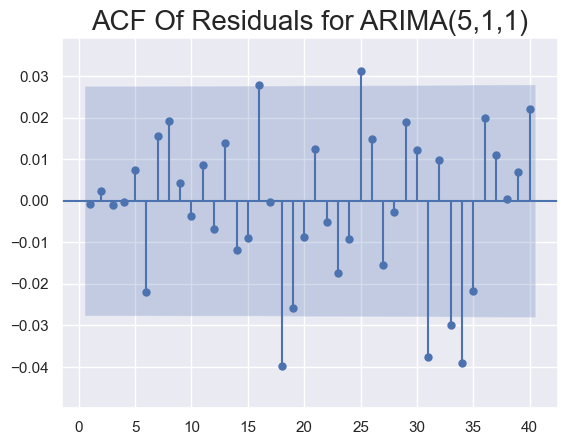

In [19]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero = False, lags = 40,auto_ylims=True)
plt.title("ACF Of Residuals for ARIMA(5,1,1)", size=20)
plt.show()

## Models with Higher Levels of Integration

In [20]:
df['delta_prices']=df.market_value.diff(1)

In [21]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27603.666
Date:                Mon, 05 Aug 2024   AIC                          55215.333
Time:                        00:35:34   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5639      0.753      0.749      0.454      -0.911       2.039
ar.L1          0.7476      0.059     12.673      0.000       0.632       0.863
ma.L1         -0.7937      0.053    -14.871      0.000      -0.898      -0.689
sigma2      3496.6352     41.191     84.888      0.000    3415.902    3577.368
===================================================================================
Ljung-Box (L1) (Q):                   2.64   Jarque-Bera (JB):              3327.38
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
sts.adfuller(df.delta_prices[1:])

(-32.24409349570748,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

In [23]:
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()
results_ar_1_i_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -27614.176
Date:                Mon, 05 Aug 2024   AIC                          55234.352
Time:                        00:35:36   BIC                          55253.915
Sample:                    01-07-1994   HQIC                         55241.207
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0178      0.010     -1.807      0.071      -0.037       0.002
ma.L1         -1.0000      0.021    -47.356      0.000      -1.041      -0.959
sigma2      3513.2017     82.609     42.528      0.000    3351.291    3675.113
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3335.05
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

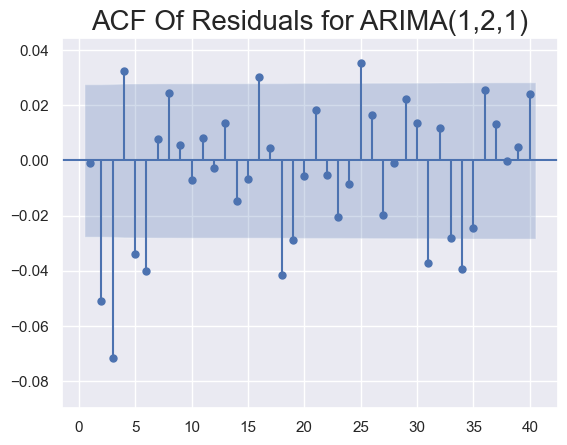

In [24]:
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero = False, lags = 40,auto_ylims=True)
plt.title("ACF Of Residuals for ARIMA(1,2,1)",size=20)
plt.show()

## ARIMAX

In [25]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog = df.spx, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26693.392
Date:                Mon, 05 Aug 2024   AIC                          53394.784
Time:                        00:35:38   BIC                          53420.869
Sample:                    01-07-1994   HQIC                         53403.925
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6928      0.035     76.407      0.000       2.624       2.762
ar.L1          0.2571      0.029      8.812      0.000       0.200       0.314
ma.L1         -0.5460      0.025    -21.791      0.000      -0.595      -0.497
sigma2      2433.0771     27.350     88.961      0.000    2379.472    2486.682
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              4423.90
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMAX

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
model_sarimax = SARIMAX(df.market_value, exog = df.spx, order=(1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.607
Date:                           Mon, 05 Aug 2024   AIC                          53439.214
Time:                                   00:35:50   BIC                          53484.864
Sample:                               01-07-1994   HQIC                         53455.211
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.7057      0.035     76.337      0.000       2.636       2.775
ar.L1          0.9998      0.000   2383.076      0.000       0.999       1.001
ma.L1         -0.3109      0.009    -32.786      0.000      -0.330      -0.292
ar.S.L5        0.9661      0.009    102.975      0.000       0.948       0.984
ar.S.L10       0.0336      0.009      3.896      0.000       0.017       0.050
ma.S.L5       -0.9989      0.006   -165.061      0.000      -1.011      -0.987
sigma2      2439.6642     28.368     86.002      0.000    2384.065    2495.264
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):              4207.00
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""